# Pokemon Classifier
A Convolutional Neural Network (CNN) designed to detect multiple Pokemon in a given image. The model is trained on a dataset containing various Pokemon characters and can identify multiple Pokemon in a single image.


In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from keras.layers import Dropout, MaxPooling2D, Conv2D, BatchNormalization
from keras import datasets, layers, models, regularizers
from PIL import Image
from sklearn.model_selection import train_test_split
import os
import random
import helper_functions

# helper_functions.automatically_setup_repository()


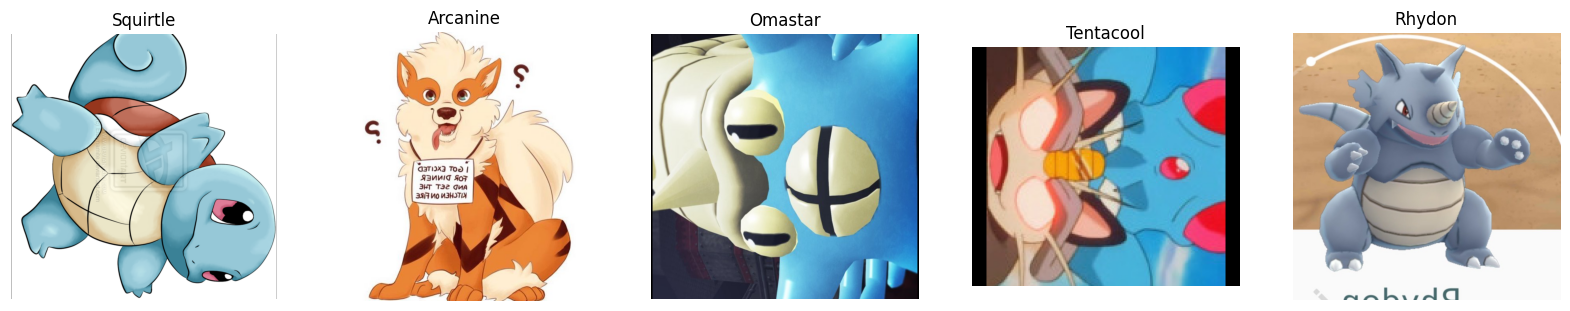

In [19]:
training_directory = 'data/training_set'
testing_directory = 'data/testing_set'


poke_list = os.listdir("data/images")
poke_dict = {string: index for index, string in enumerate(poke_list)}

fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    random_pokemon = random.choice(os.listdir(training_directory))
    random_pokemon_image = random.choice(os.listdir(training_directory + '/' + random_pokemon))
    img = mpimg.imread(training_directory + '/' + random_pokemon + '/' + random_pokemon_image)
    ax[i].set_title(random_pokemon)
    ax[i].axis('off')
    ax[i].imshow(img)

In [20]:
# can speed up our compilation by pre-processing our images at once
def resize_image(image_path):
    with Image.open(image_path) as i:
        if i.mode != 'RGB':
            i = i.convert('RGB')
        i = i.resize((64, 64))
        return np.array(i)

print("Getting Training Photos")
#loop through creating dataset that contains [label, path_to_image]
dataset = []
for poke_folder in os.listdir(training_directory):
    print(poke_folder, end=", ")
    for poke_img in os.listdir(training_directory + '/' + poke_folder):
        img = resize_image(training_directory + '/' + poke_folder + '/' + poke_img)
        dataset.append([poke_folder, img])
print("\nDone")
# place training data into x and labels into y
y_train = np.array([poke_dict[x[0]] for x in dataset])
x_train = np.array([x[1] for x in dataset])

# shuffle the lists with same order
zipped = list(zip(x_train, y_train))
random.shuffle(zipped)
x_train, y_train = zip(*zipped)
x_train, y_train = np.array(list(x_train)), np.array(list(y_train))

print("Getting Testing Photos")
dataset = []
for poke_folder in os.listdir(testing_directory):
    print(poke_folder, end=", ")
    for poke_img in os.listdir(testing_directory + '/' + poke_folder):
        img = resize_image(testing_directory + '/' + poke_folder + '/' + poke_img)
        dataset.append([poke_folder, img])
print("\nDone")

y_test = np.array([poke_dict[x[0]] for x in dataset])
x_test = np.array([x[1] for x in dataset])

# shuffle the lists with same order
zipped = list(zip(x_test, y_test))
random.shuffle(zipped)
x_test, y_test = zip(*zipped)
x_test, y_test = np.array(list(x_test)), np.array(list(y_test))

x_test = x_test / 255.0
x_train = x_train / 255.0

print("Reshapping")
# Flatten the image arrays for the MLP input
x_test = x_test.reshape(x_test.shape[0], -1)
x_train = x_train.reshape(x_train.shape[0], -1)
# split data into training and testing
# x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.20)
print("Done")

x_train = x_train.reshape(x_train.shape[0], 64, 64, 3)
x_test = x_test.reshape(x_test.shape[0], 64, 64, 3)

print(f"Number of training data: {len(y_train)}")
print(f"Number of testing data: {len(y_test)}")



Getting Training Photos
Zapdos, Kadabra, Alolan Sandslash, Omanyte, Shellder, Bellsprout, Eevee, Jolteon, Hypno, Seel, Zubat, Graveler, Magneton, Abra, Kingler, Alakazam, Clefable, Gyarados, Poliwag, Rapidash, Machamp, Pinsir, Muk, Seaking, Magikarp, Goldeen, Venusaur, Flareon, Jigglypuff, Doduo, Weedle, Vileplume, Arcanine, Tentacruel, Gloom, Charmeleon, Articuno, Sandshrew, Spearow, Marowak, Clefairy, Snorlax, Scyther, Primeape, Diglett, Onix, Mankey, Rattata, Voltorb, Gengar, Gastly, Cloyster, Weepinbell, Dragonair, Squirtle, Pikachu, Victreebel, Charmander, Staryu, Venonat, Vaporeon, Ivysaur, Krabby, Drowzee, Sandslash, Kangaskhan, Chansey, Butterfree, Starmie, Magmar, Beedrill, Ninetales, Magnemite, Metapod, Electrode, Raichu, Fearow, Mewtwo, Kabuto, Pidgeotto, Hitmonchan, Blastoise, Weezing, Golbat, Seadra, Rhyhorn, Moltres, Golduck, Kabutops, Aerodactyl, Haunter, Machop, Koffing, Pidgeot, Wigglytuff, Porygon, Vulpix, Dugtrio, Ditto, Raticate, Geodude, Tentacool, Horsea, Oddish, 

In [ ]:



model = models.Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))



model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(.01)))
model.add(Dropout(0.2))
model.add(layers.Dense(151, activation='softmax'))

model.summary()


In [22]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, 
                    batch_size= 512,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(test_acc)


Epoch 1/100
31/64 [=============>................] - ETA: 29s - loss: 12.9831 - accuracy: 0.0243

KeyboardInterrupt: 

In [ ]:
import sys

def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    # filename = sys.argv[0].split('/')[-1]
    # plt.savefig(filename + '_plot.png')
    # plt.close()




# Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in poke_list}
total_pred = {classname: 0 for classname in poke_list}

# Get model predictions on the test set
predictions = model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1)

# Plot the  first 10 images in 2 rows test image and predicted label using Matplotlib, state the prediction vs actual name
plt.figure(figsize=(20, 20))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)

    plt.imshow(x_test[i], cmap=plt.cm.binary)    
    plt.title(f"Prediction: {poke_list[predicted_labels[i]]}\nActual: {poke_list[y_test[i]]}")
    
    plt.axis("off")

plt.show()

summarize_diagnostics(history)
plt.show()

# Collect the correct predictions for each class
for true_label, predicted_label in zip(y_test, predicted_labels):
    true_class = poke_list[true_label]
    if true_label == predicted_label:
        correct_pred[true_class] += 1
    total_pred[true_class] += 1

# Print accuracy for each class
for classname, correct_count in correct_pred.items():
    if total_pred[classname] != 0:
        accuracy = 100 * float(correct_count) / total_pred[classname]
    else:
        accuracy = 0
    print(f'Accuracy for class: {classname:12s} is {accuracy:.1f} %')

# Print overall accuracy
overall_accuracy = 100 * (sum(correct_pred.values()) / sum(total_pred.values()))
print(f'Overall accuracy is {overall_accuracy:.1f} %')



# Save the model

In [ ]:
model.save('output/pokemon_classifier.keras')